In [86]:
import pandas as pd
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib.colors import LogNorm
from scipy.interpolate import interp1d

module_dir = os.path.abspath('../../src')  # Adjust path as needed
sys.path.append(module_dir)

from parser_fun import merge_hdfs_multi
from plot_functions import auto_plot_style
from plot_functions import color_sequence
import plot_functions as pf

import analysis_functions as af
import stats

#Can be removed later
import importlib
importlib.reload(af)
importlib.reload(stats)
#

<module 'stats' from '/scratch/torellis/ASpirit/src/stats.py'>

In [99]:
run_list = [15614,15615]

In [100]:
maps = [af.load_kr_map(a_file) for a_file in [f'map_run{a_run}.npz' for a_run in run_list ] ]

In [88]:
xedges = maps[0].xedges
yedges = maps[0].yedges
zedges = maps[0].zedges

In [89]:
map_shape = (len(xedges) - 1, len(yedges) - 1, len(zedges) - 1)
map_counts = np.zeros(map_shape)
map_values = np.zeros(map_shape)
map_h = np.zeros(map_shape)

In [90]:
for i in range(len(maps)):
    #map_counts += maps[i].hcounts
    map_counts += np.where(maps[i].hmap > 0, maps[i].hcounts, 0)
    map_values += maps[i].hratio*maps[i].hcounts
    map_h += maps[i].hmap*maps[i].hcounts

In [91]:
hratio = np.where(map_counts != 0, map_values / map_counts, 0)
hmap = np.where(map_counts != 0, map_h / map_counts, 0)

/tmp/ipykernel_372151/4022099563.py:1: RuntimeWarning: divide by zero encountered in divide
  hratio = np.where(map_counts != 0, map_values / map_counts, 0)
/tmp/ipykernel_372151/4022099563.py:1: RuntimeWarning: invalid value encountered in divide
  hratio = np.where(map_counts != 0, map_values / map_counts, 0)
/tmp/ipykernel_372151/4022099563.py:2: RuntimeWarning: invalid value encountered in divide
  hmap = np.where(map_counts != 0, map_h / map_counts, 0)


In [95]:
ave_map = af.MapPar(
    hratio,
    map_counts,
    xedges,
    yedges,
    zedges
)

In [96]:
ave_map.hmap = hmap

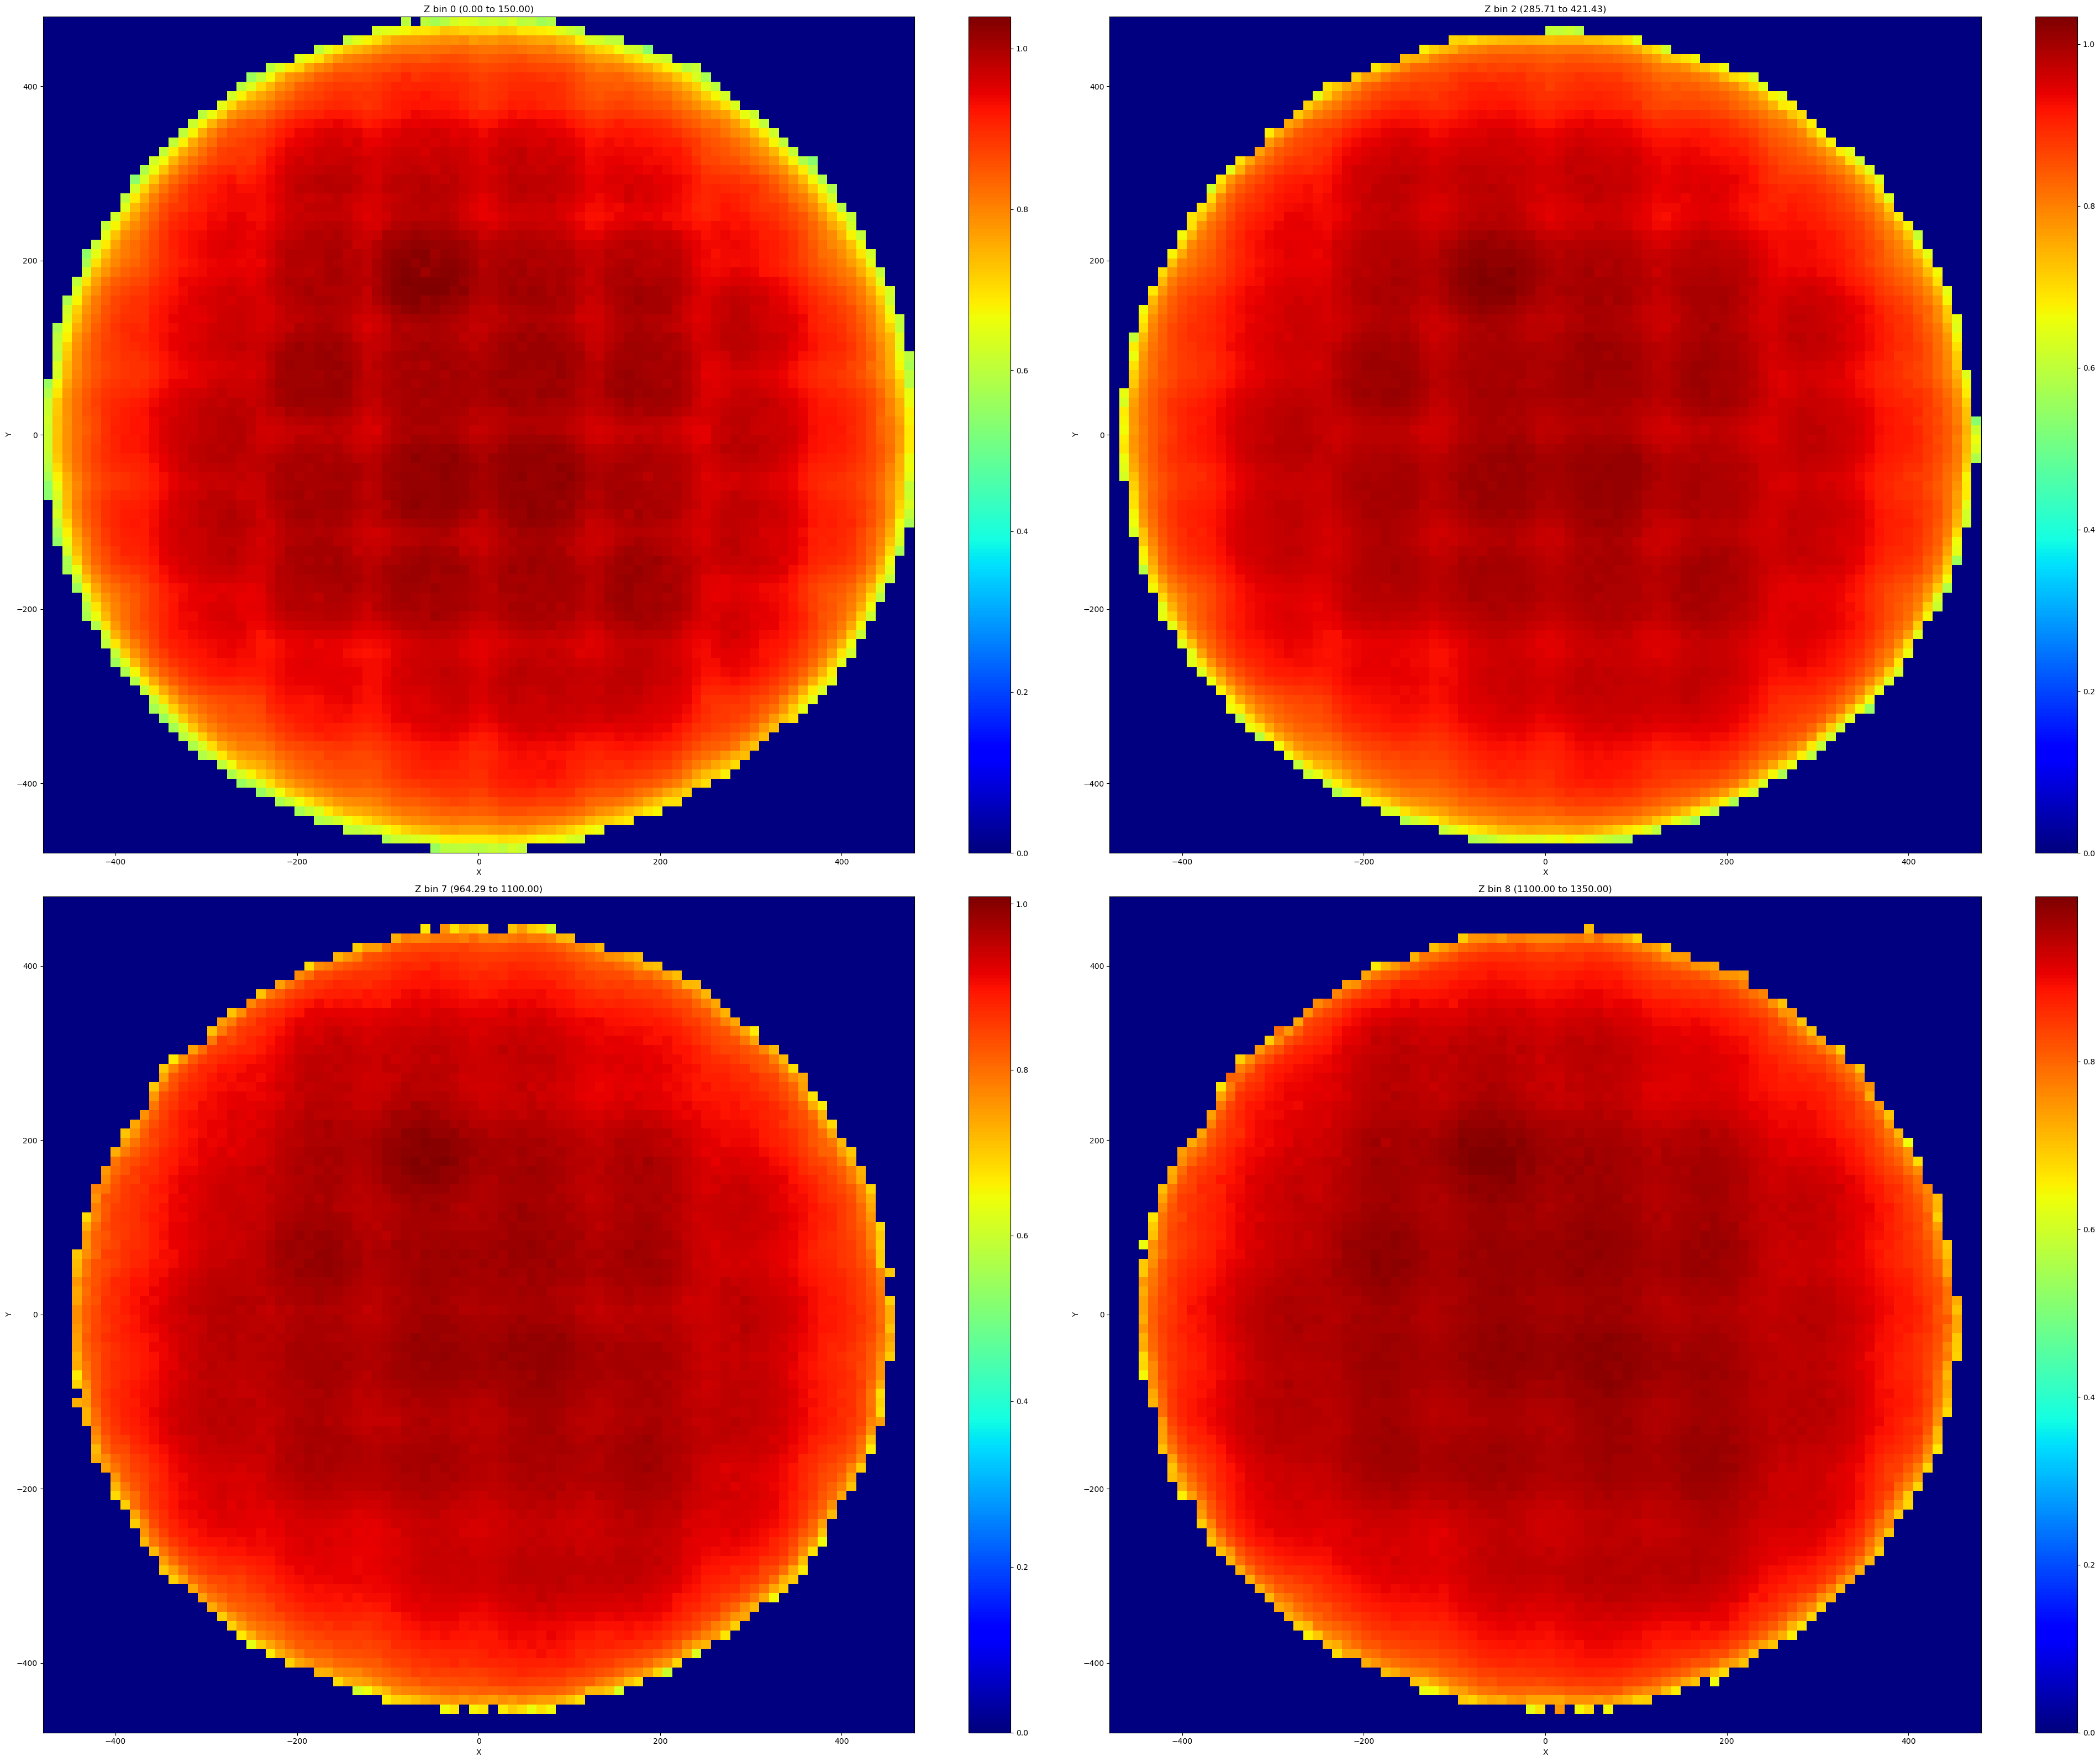

In [97]:
af.plot_3d_histogram_slices(ave_map.hmap, ave_map.xedges, ave_map.yedges, ave_map.zedges, z_indices=[0,2,len(ave_map.zedges)-3,len(ave_map.zedges)-2], figsize= (20, 16))

In [101]:
af.save_kr_map(ave_map,f'average_map_{run_list[0]}_{run_list[-1]}.npz')
